In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

In [2]:
nba_data = os.path.join("combined_nba_data.csv")
origin_data = os.path.join("nba_origins.csv")
nba_df = pd.read_csv(nba_data)
origins_df = pd.read_csv(origin_data, encoding='cp1252')

In [3]:
#api_key = "c45e33fa47a9854838ab20e8f2190207"
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "imperial"
#query_url = url + "&units=" + units + "&appid=" + api_key + "&q="

In [4]:
full_df = pd.merge(origins_df, nba_df, how="left", on="Player")
full_df.head()

,Player,Pos,HT,WT,Age_x,Teams,GP,YOS,Pre-Draft Team,Draft Status,...,Ast%,Ast/TO,AST RATIO,O-Reb%,D-Reb%,Reb%,TO RATIO,True Shooting%,Usage%,Salary
0,Alex Abrines,GF,78.0,190.0,23.0,OKC,68.0,0.0,FC Barcelona Lassa (Spain),2013 Rnd 2 Pick 2,...,5.5,1.21,9.2,1.9,7.4,4.6,7.6,56.0,15.7,5994764.0
1,Quincy Acy,F,79.0,240.0,26.0,"BRK, DAL",38.0,4.0,Baylor,2012 Rnd 2 Pick 7,...,5.3,0.86,7.6,4.1,19.2,11.7,8.9,56.5,16.9,1790092.0
2,Steven Adams,C,85.0,255.0,23.0,OKC,80.0,3.0,Pittsburgh,2013 Rnd 1 Pick 12,...,5.4,0.59,8.6,12.8,15.1,14.0,14.6,58.9,16.0,3140517.0
3,Arron Afflalo,SG,77.0,210.0,31.0,SAC,61.0,9.0,UCLA,2007 Rnd 1 Pick 27,...,7.7,1.86,13.4,0.7,8.7,4.7,7.2,55.9,14.7,12500000.0
4,Alexis Ajinca,C,86.0,248.0,28.0,NOP,39.0,6.0,Hyeres-Toulon (France),2008 Rnd 1 Pick 20,...,3.1,0.39,5.0,8.4,22.5,15.7,13.0,52.9,17.1,4713203.0


In [32]:
country_count = pd.DataFrame(full_df['Nationality'].value_counts())
country_count.reset_index(inplace=True)
country_count

,index,Nationality
0,United States,372
1,Canada,13
2,France,12
3,Brazil,9
4,Spain,8
5,Australia,5
6,Argentina,5
7,Bosnia and Herzegovina,5
8,Switzerland,4
9,Croatia,3


In [6]:
country_list = full_df['Nationality']
pre_nba_list = full_df['Pre-Draft Team'].unique()

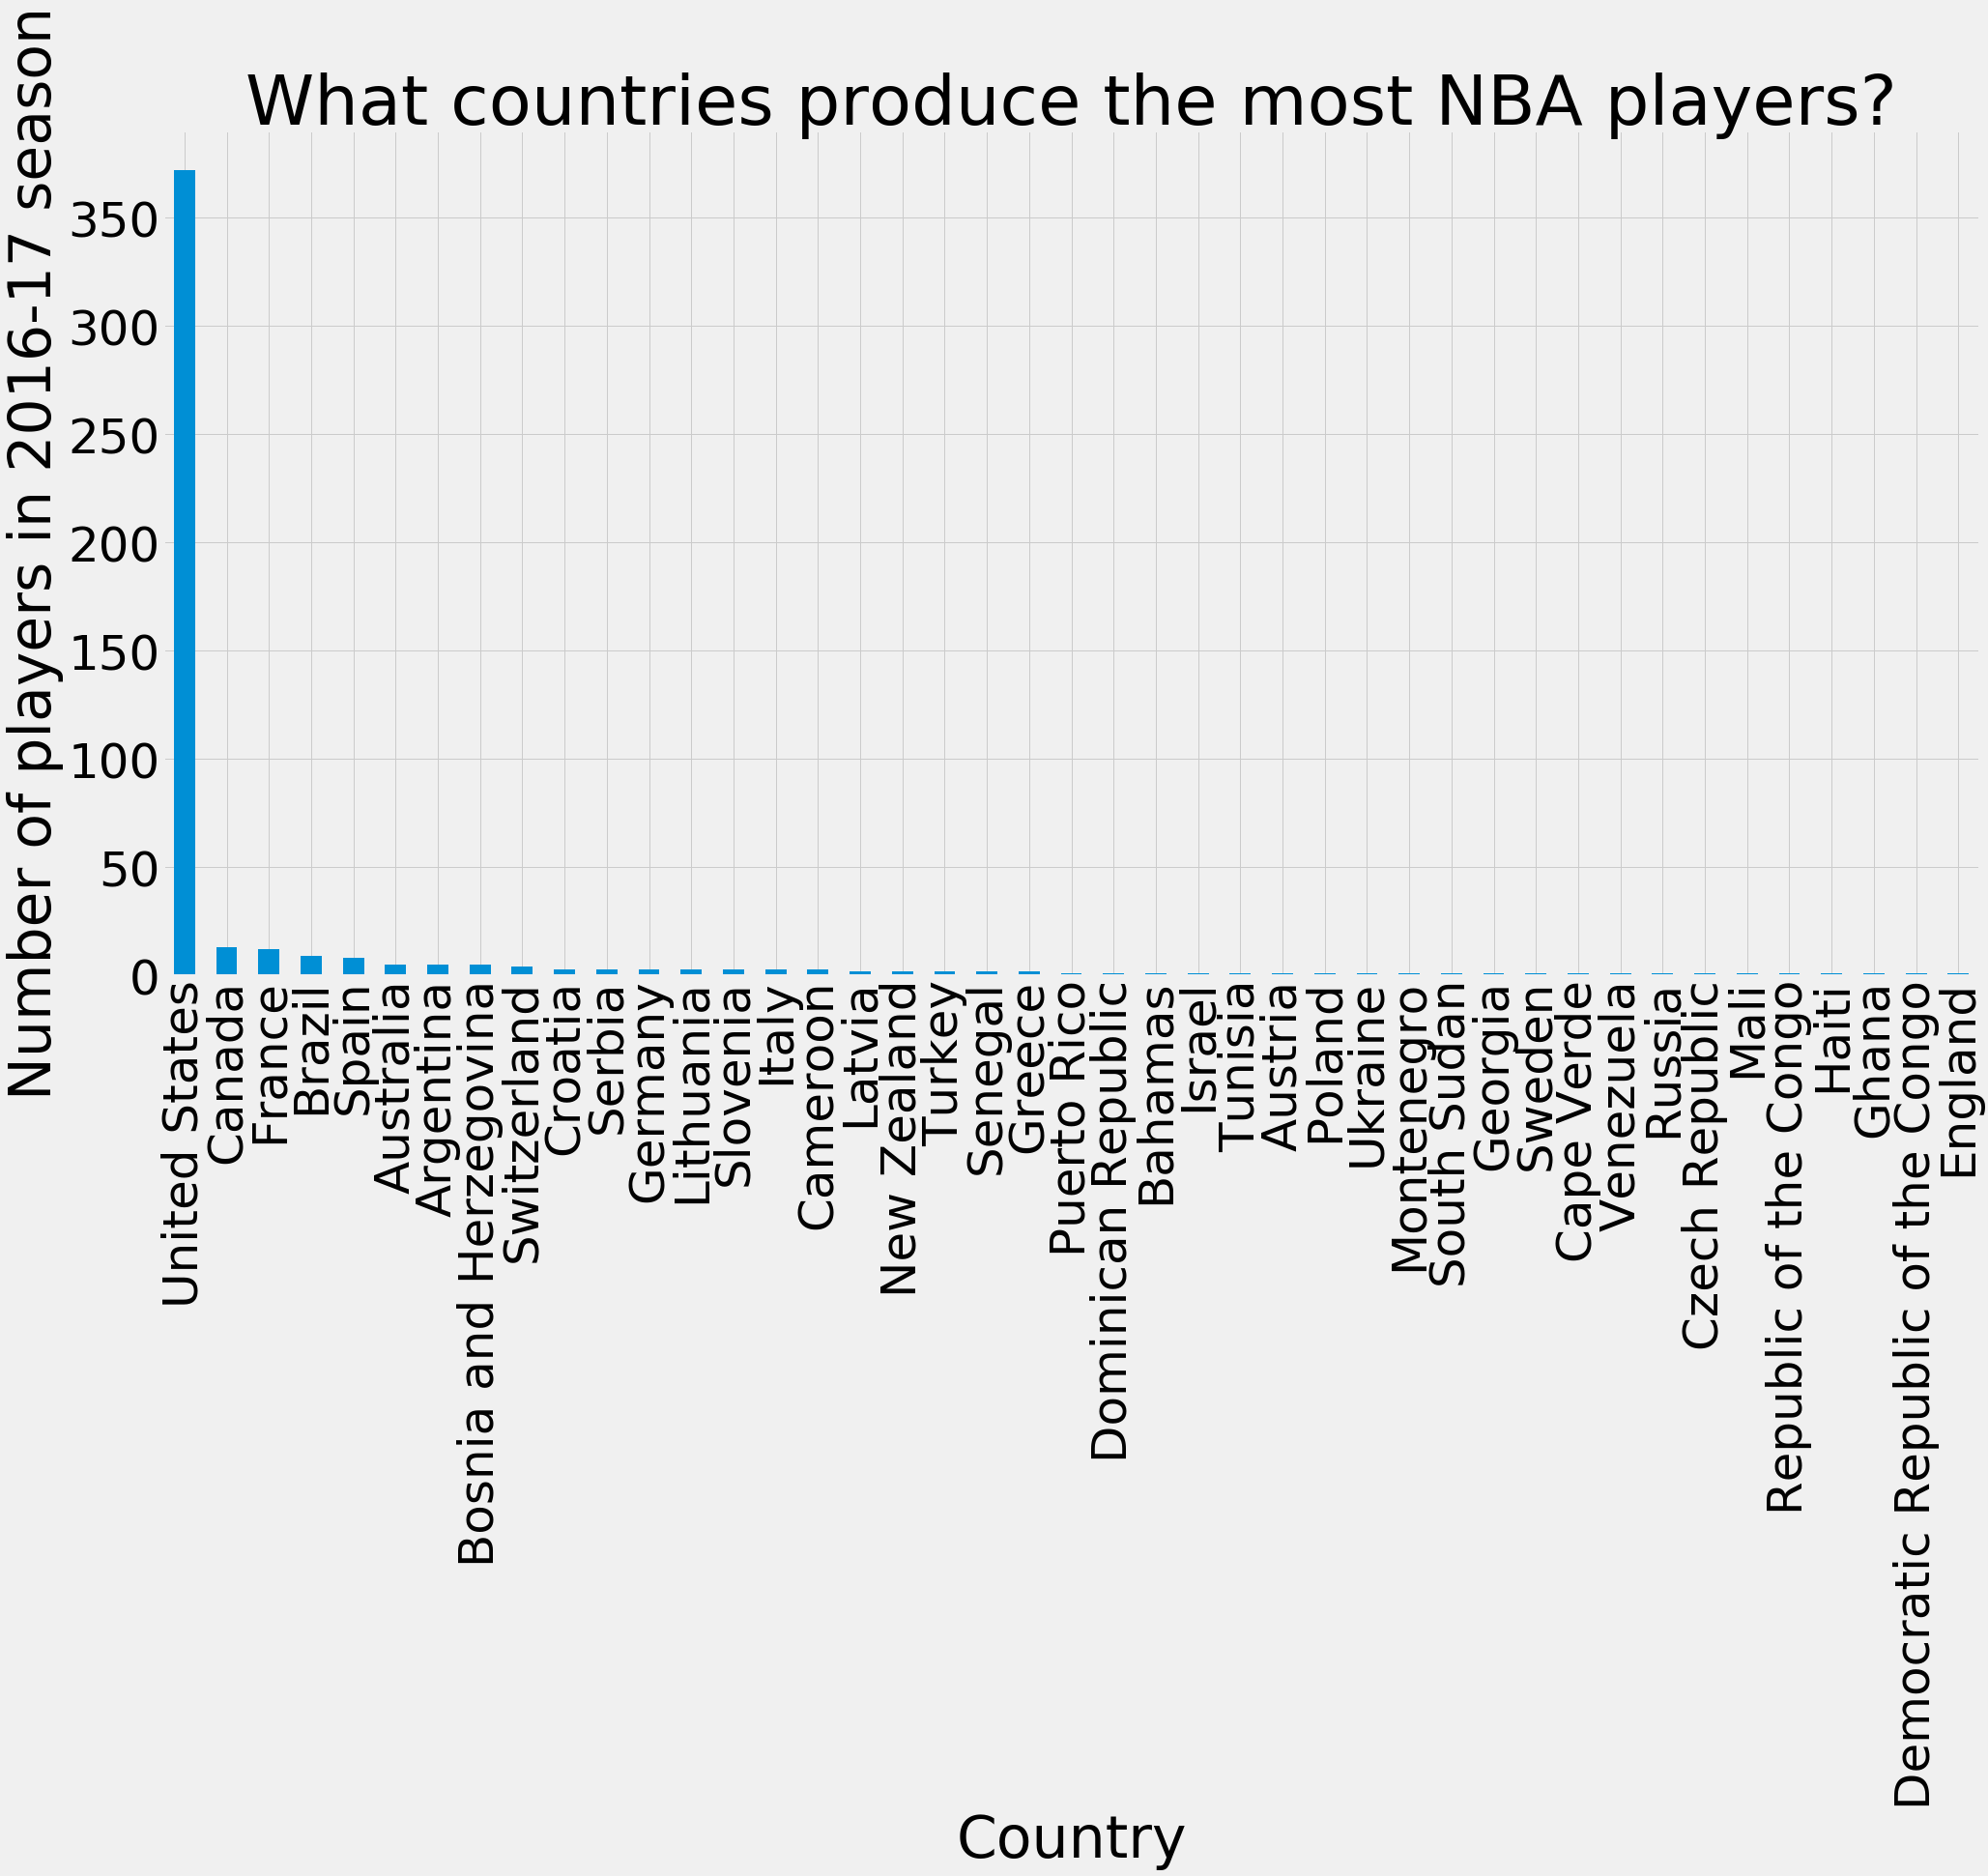

In [31]:


plt.figure(figsize=(30,15))
plt.rcParams.update({'font.size': 50})
full_df['Nationality'].value_counts().plot(kind='bar')

plt.grid(True)
plt.title("What countries produce the most NBA players?")
plt.xlabel("Country")
plt.ylabel("Number of players in 2016-17 season")
plt.savefig("NBA_Countries.png")
plt.show()

In [29]:
full_df['Foreign'] = np.where(full_df['Nationality'] != "United States" , 'Foreign', full_df['Nationality'])
full_df

,Player,Pos,HT,WT,Age_x,Teams,GP,YOS,Pre-Draft Team,Draft Status,...,Ast/TO,AST RATIO,O-Reb%,D-Reb%,Reb%,TO RATIO,True Shooting%,Usage%,Salary,Foreign
0,Alex Abrines,GF,78.0,190.0,23.0,OKC,68.0,0.0,FC Barcelona Lassa (Spain),2013 Rnd 2 Pick 2,...,1.21,9.2,1.9,7.4,4.6,7.6,56.0,15.7,5994764.0,Foreign
1,Quincy Acy,F,79.0,240.0,26.0,"BRK, DAL",38.0,4.0,Baylor,2012 Rnd 2 Pick 7,...,0.86,7.6,4.1,19.2,11.7,8.9,56.5,16.9,1790092.0,United States
2,Steven Adams,C,85.0,255.0,23.0,OKC,80.0,3.0,Pittsburgh,2013 Rnd 1 Pick 12,...,0.59,8.6,12.8,15.1,14.0,14.6,58.9,16.0,3140517.0,Foreign
3,Arron Afflalo,SG,77.0,210.0,31.0,SAC,61.0,9.0,UCLA,2007 Rnd 1 Pick 27,...,1.86,13.4,0.7,8.7,4.7,7.2,55.9,14.7,12500000.0,United States
4,Alexis Ajinca,C,86.0,248.0,28.0,NOP,39.0,6.0,Hyeres-Toulon (France),2008 Rnd 1 Pick 20,...,0.39,5.0,8.4,22.5,15.7,13.0,52.9,17.1,4713203.0,Foreign
5,Joe Johnson,SG,79.0,240.0,35.0,UTA,78.0,15.0,Arkansas,2001 Rnd 1 Pick 10,...,2.09,16.5,2.2,12.9,7.7,7.9,54.2,18.6,11000000.0,United States
6,LaMarcus Aldridge,FC,83.0,260.0,31.0,SAS,72.0,10.0,Texas,2006 Rnd 1 Pick 2,...,1.42,9.9,8.4,17.1,12.8,7.0,53.2,24.9,20575005.0,United States
7,Lavoy Allen,PF,81.0,260.0,28.0,IND,61.0,5.0,Temple,2011 Rnd 2 Pick 20,...,1.97,21.2,13.3,15.4,14.3,10.8,48.5,10.6,NaN,United States
8,Tony Allen,SG,76.0,213.0,35.0,MEM,71.0,12.0,Oklahoma State,2004 Rnd 1 Pick 25,...,0.98,11.5,9.5,13.9,11.6,11.8,49.3,18.1,5505618.0,United States
9,Al-Farouq Aminu,F,81.0,220.0,26.0,POR,61.0,6.0,Wake Forest,2010 Rnd 1 Pick 8,...,1.05,13.8,4.9,23.2,14.1,13.1,50.6,15.8,7680965.0,United States


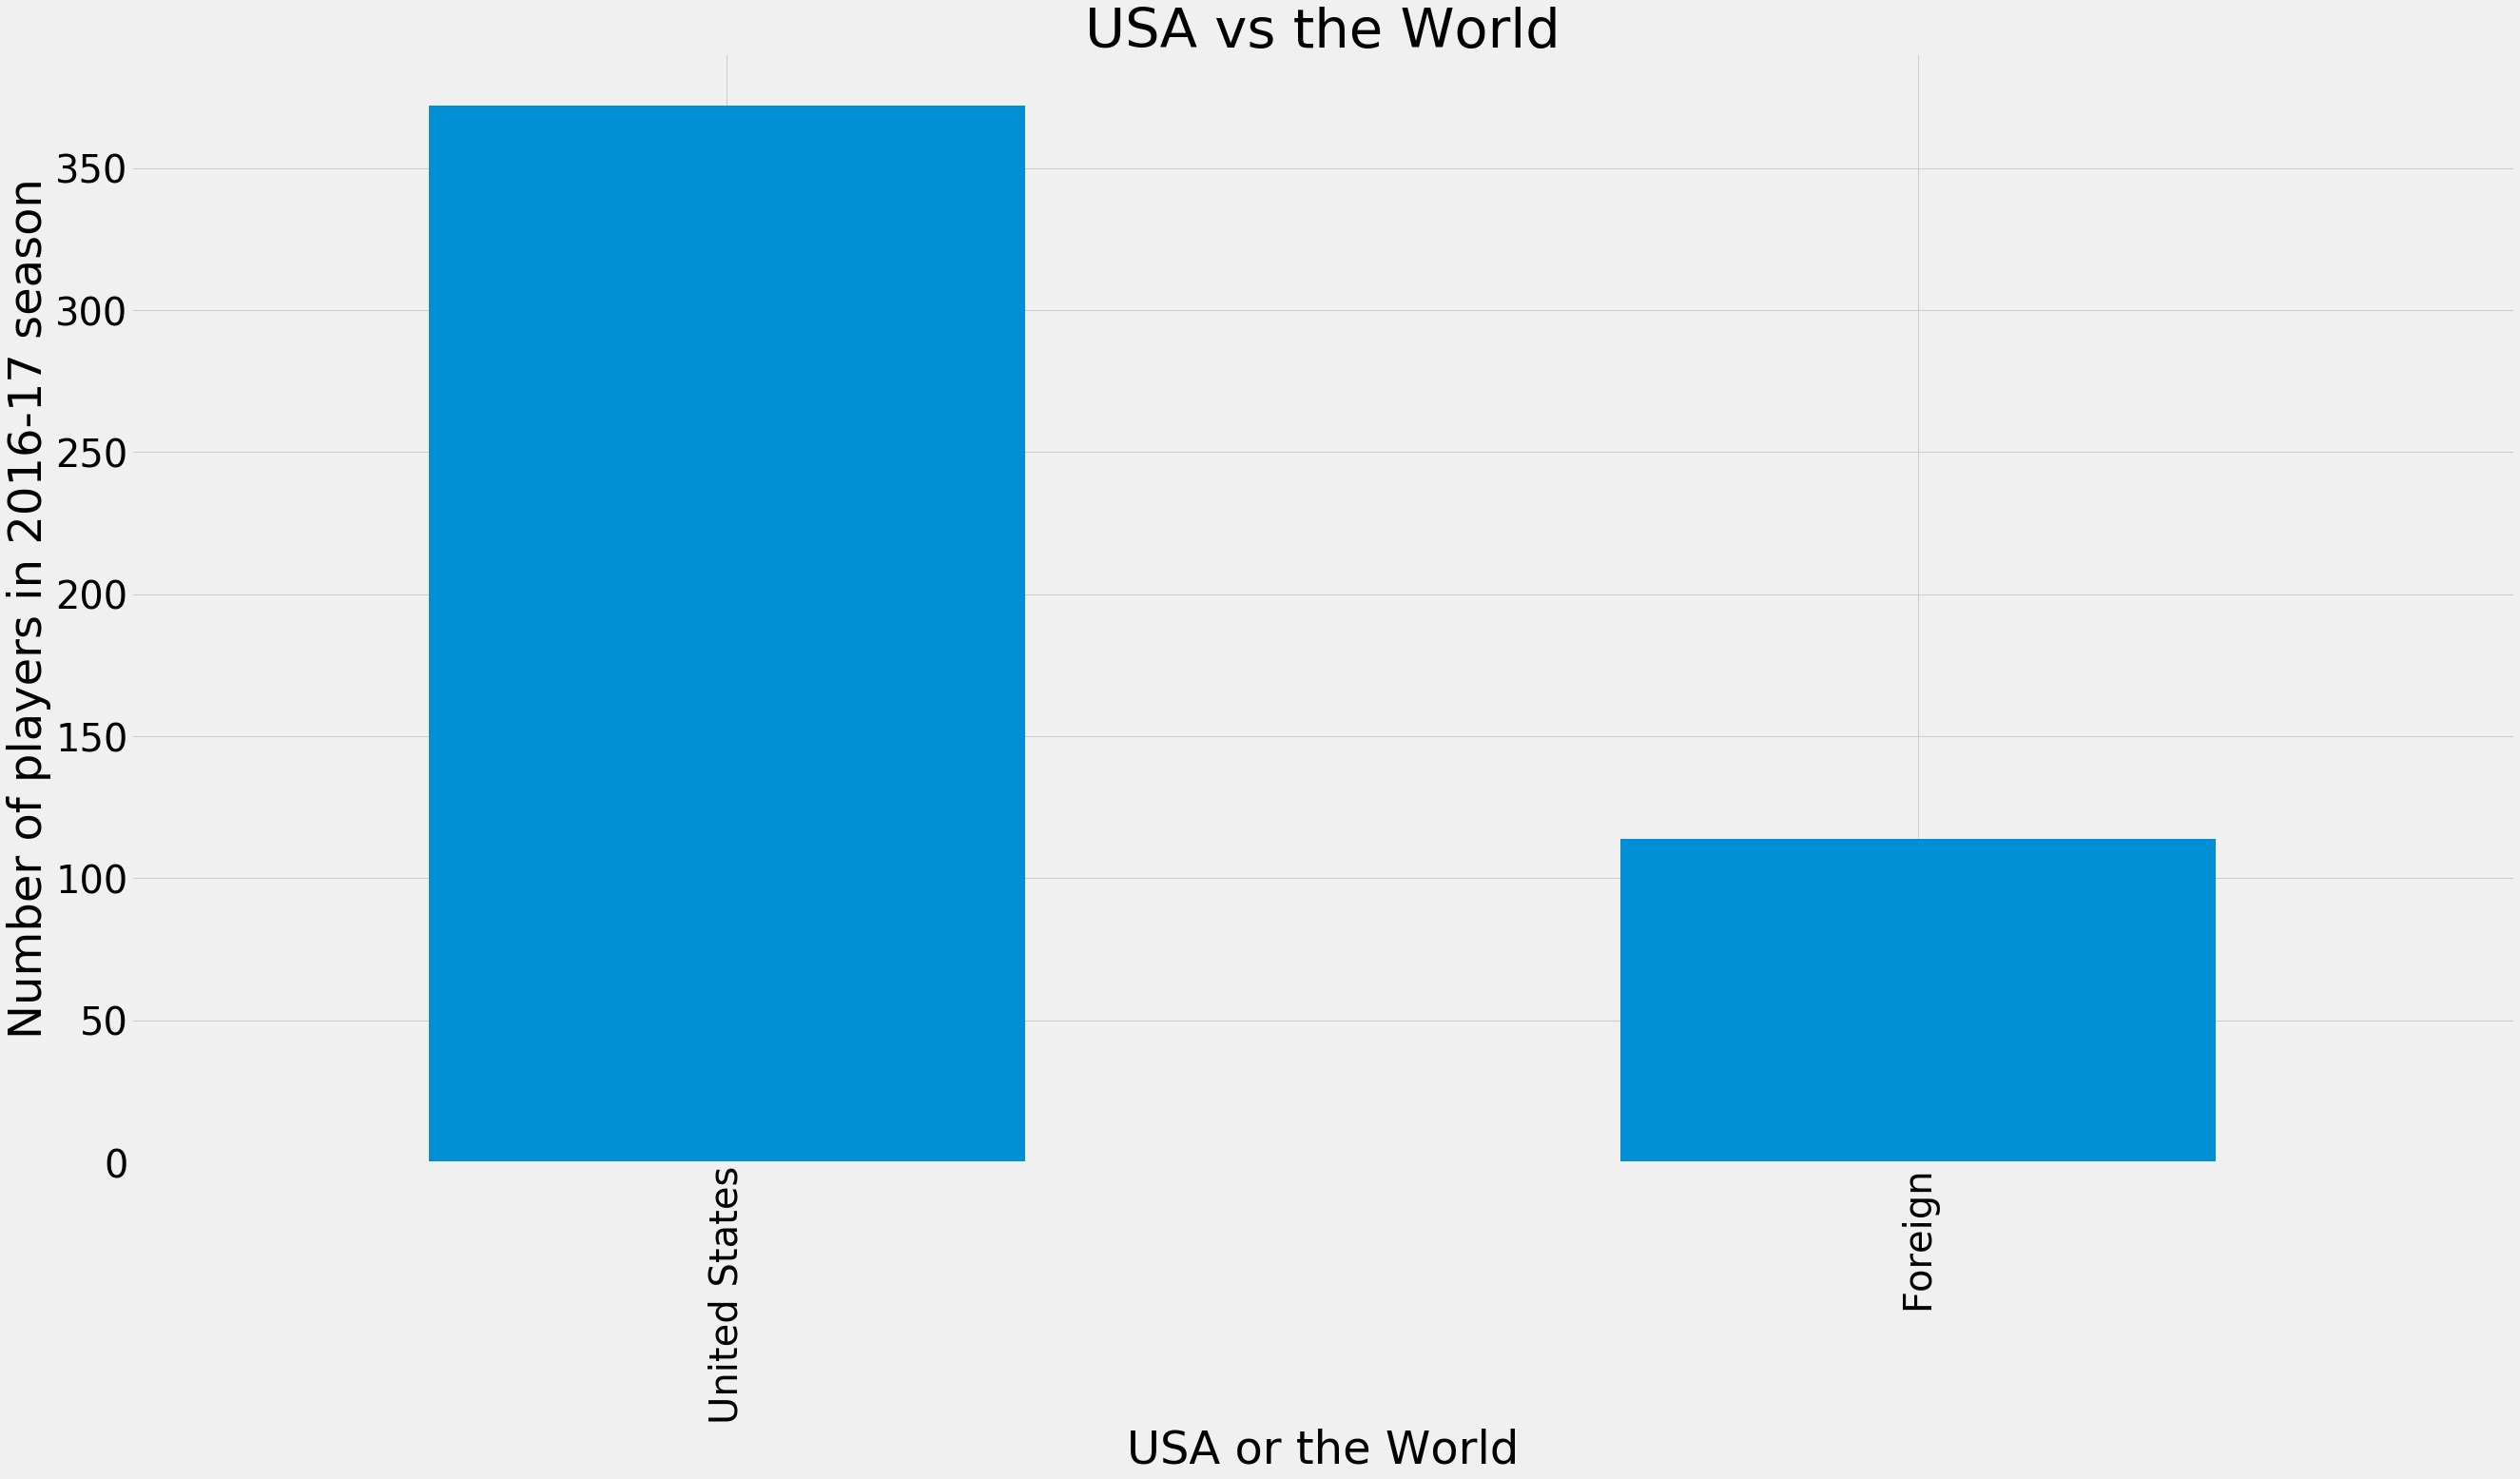

In [30]:
plt.figure(figsize=(40,20))
plt.rcParams.update({'font.size': 40})

full_df['Foreign'].value_counts().plot(kind='bar')
plt.grid(True)
plt.title("USA vs the World")
plt.xlabel("USA or the World")
plt.ylabel("Number of players in 2016-17 season")
plt.savefig("NBA_Countries2.png")
plt.show()

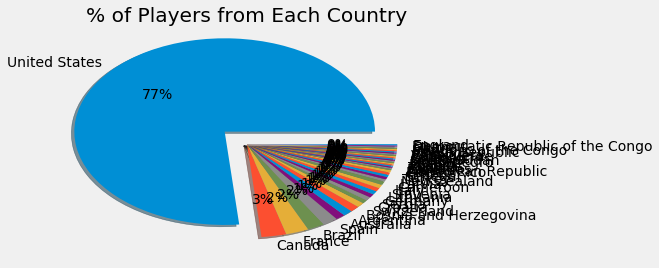

In [10]:
plt.style.use('fivethirtyeight')
countries = country_count['Nationality']
labels = country_count['index']
explode = [.2, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
figsize=(60,60)
plt.title('% of Players from Each Country')
plt.pie(countries, labels=labels, explode=explode, shadow=True, autopct='%1.f%%')
plt.rcParams['font.size'] = 15.0
plt.savefig("NBA_pie.png")
plt.show()

In [20]:
usa_df = full_df[full_df['Foreign'] != 'Foreign']
foreign_df = full_df[full_df['Foreign'] == 'Foreign']
foreign_df

,Player,Pos,HT,WT,Age_x,Teams,GP,YOS,Pre-Draft Team,Draft Status,...,Ast/TO,AST RATIO,O-Reb%,D-Reb%,Reb%,TO RATIO,True Shooting%,Usage%,Salary,Foreign
0,Alex Abrines,GF,78.0,190.0,23.0,OKC,68.0,0.0,FC Barcelona Lassa (Spain),2013 Rnd 2 Pick 2,...,1.21,9.2,1.9,7.4,4.6,7.6,56.0,15.7,5994764.0,Foreign
2,Steven Adams,C,85.0,255.0,23.0,OKC,80.0,3.0,Pittsburgh,2013 Rnd 1 Pick 12,...,0.59,8.6,12.8,15.1,14.0,14.6,58.9,16.0,3140517.0,Foreign
4,Alexis Ajinca,C,86.0,248.0,28.0,NOP,39.0,6.0,Hyeres-Toulon (France),2008 Rnd 1 Pick 20,...,0.39,5.0,8.4,22.5,15.7,13.0,52.9,17.1,4713203.0,Foreign
15,Giannis Antetokounmpo,F,83.0,222.0,22.0,MIL,80.0,3.0,Filathlitikos Div II Greece (Greece),2013 Rnd 1 Pick 15,...,1.85,19.8,5.8,22.6,14.3,10.7,59.9,28.3,2995421.0,Foreign
17,Joel Anthony,C,81.0,245.0,34.0,SAS,19.0,9.0,UNLV,"2007 NBA Draft, Undrafted",...,0.75,11.3,6.8,19.0,13.0,15.1,64.0,8.8,346034.0,Foreign
20,Omer Asik,C,85.0,255.0,30.0,NOP,31.0,6.0,Fenerbahce Ulker (Turkey),2008 Rnd 2 Pick 6,...,1.07,13.5,10.1,25.2,17.5,12.6,51.7,8.8,9904494.0,Foreign
25,Leandro Barbosa,G,75.0,194.0,34.0,PHX,67.0,13.0,Bauru (Brazil),2003 Rnd 1 Pick 28,...,1.69,15.0,1.8,10.6,6.2,8.9,50.9,20.7,4000000.0,Foreign
26,J.J. Barea,G,73.0,185.0,32.0,DAL,35.0,10.0,Northeastern,"2006 NBA Draft, Undrafted",...,3.06,31.1,1.3,11.7,6.4,10.1,52.1,26.1,NaN,Foreign
31,Nicolas Batum,F,80.0,200.0,28.0,CHA,77.0,8.0,Le Mans Sarthe Basket (France),2008 Rnd 1 Pick 25,...,2.35,26.1,1.9,18.4,10.1,11.1,52.9,22.1,20869565.0,Foreign
33,Aron Baynes,C,82.0,260.0,30.0,DET,75.0,4.0,Washington State,"2009 NBA Draft, Undrafted",...,0.64,8.0,10.8,20.6,15.8,12.4,57.0,14.3,6500000.0,Foreign
